#### Dataset = kaggle competitions download -c digit-recognizer

## import dataset

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-13 10:56:57.466988: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-13 10:56:57.477081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-13 10:56:57.551624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-13 10:56:57.620549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752386217.677030    4201 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752386217.69

In [2]:
train_df = pd.read_csv("../Datasets/digit-recognizer/train.csv")
test_df = pd.read_csv("../Datasets/digit-recognizer/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## preprocessing

In [4]:
x_train = train_df.drop('label', axis=1).values / 255.0
y_train = train_df['label'].values


In [5]:
x_test = test_df.values / 255.0


In [6]:
x_train.shape

(42000, 784)

In [7]:
from sklearn.model_selection import train_test_split

x_train_reduced, x_dev, y_train_reduced, y_dev = train_test_split(
    x_train, y_train, test_size=2000, random_state=42, shuffle=True
)

In [8]:
print("Original x_train shape:", x_train.shape)
print("Reduced x_train shape:", x_train_reduced.shape)
print("x_dev shape:", x_dev.shape)

Original x_train shape: (42000, 784)
Reduced x_train shape: (40000, 784)
x_dev shape: (2000, 784)


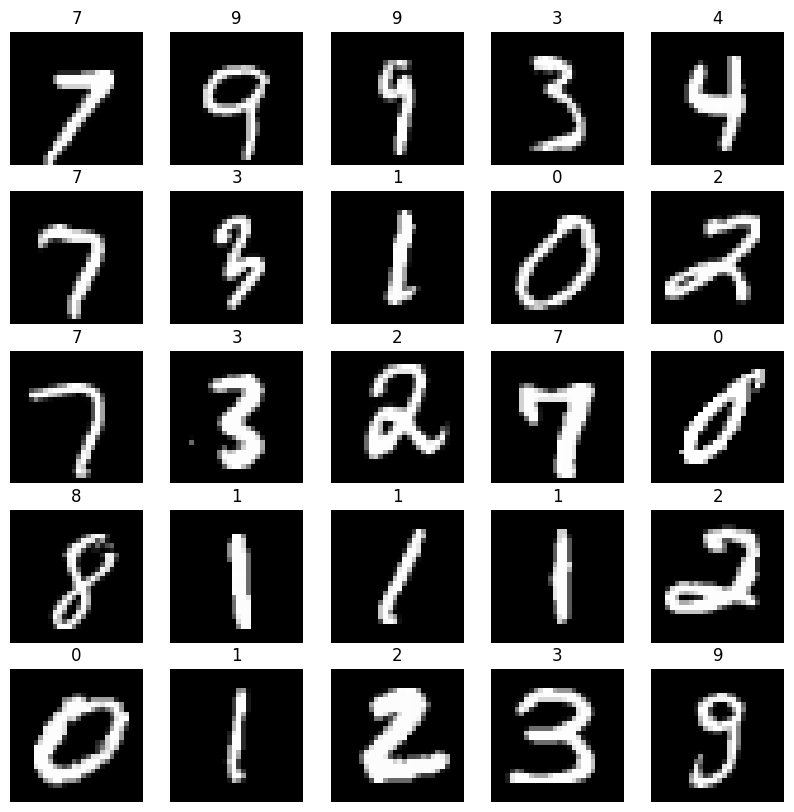

In [9]:

# Create iterators
images_iter = iter(x_train_reduced)
labels_iter = iter(y_train_reduced)

# Plot 25 samples
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(next(images_iter).reshape(28, 28), cmap='gray')  # Reshape for MNIST (28x28)
    plt.title(int(next(labels_iter)))  # Convert label to integer
    plt.axis("off")
plt.show()

In [17]:
# one hot encode
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_encoded = to_categorical(y_train_reduced)
y_dev_encoded = to_categorical(y_dev)


In [ ]:
print(y_train_encoded.shape) 


(40000, 10)


In [57]:
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(x_train_reduced.shape[1],)),  
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),    
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),     
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),     
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax') ,
    
])

# model = tf.keras.models.Sequential([
#     tf.keras.Input(shape=(x_train_reduced.shape[1],)),  
#     tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.5),   
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.3),    
#     tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)), 
#     tf.keras.layers.Dropout(0.1), 
#     tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax') ,
    
# ])

In [58]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [59]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [61]:
model.fit(
    x_train_reduced, y_train_encoded,
    epochs=50,
    batch_size=64,
    validation_data=(x_dev, y_dev_encoded)
)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9933 - loss: 0.0949 - val_accuracy: 0.9710 - val_loss: 0.1599
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9935 - loss: 0.0942 - val_accuracy: 0.9715 - val_loss: 0.1599
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9930 - loss: 0.0961 - val_accuracy: 0.9720 - val_loss: 0.1602
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9931 - loss: 0.0955 - val_accuracy: 0.9720 - val_loss: 0.1601
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9935 - loss: 0.0941 - val_accuracy: 0.9715 - val_loss: 0.1596
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9934 - loss: 0.0948 - val_accuracy: 0.9715 - val_loss: 0.1598
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9946 - loss: 0.0921 - val_accuracy: 0.9715 - val_loss: 0.1598
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9939 - loss: 0.0942 - val_accuracy: 0.

In [62]:
print(test_df.shape)

(28000, 784)


In [63]:
x_test = test_df.values / 255.0


In [64]:
y_pred_probs = model.predict(x_test)  
y_pred = y_pred_probs.argmax(axis=1)  

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [68]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})

submission_df.to_csv('../Datasets/digit-recognizer/submission.csv', index=False)
